<a href="https://colab.research.google.com/github/ygebre1/us-migration-flow-analysis-and-visualization/blob/trial1/eda_migration_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("migrations_2010_to_2022.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33696 entries, 0 to 33695
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   current_state               33696 non-null  object
 1   year                        33696 non-null  int64 
 2   population                  33696 non-null  int64 
 3   same_house                  33696 non-null  int64 
 4   same_state                  33696 non-null  int64 
 5   from_different_state_Total  33696 non-null  int64 
 6   abroad_Total                33696 non-null  int64 
 7   from                        33696 non-null  object
 8   number_of_people            33696 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 2.3+ MB


In [4]:
df.describe()

,year,population,same_house,same_state,from_different_state_Total,abroad_Total,number_of_people
count,33696.000000,3.369600e+04,3.369600e+04,3.369600e+04,33696.000000,33696.000000,33696.000000
mean,2015.666667,6.182295e+06,5.301008e+06,7.009108e+05,143026.354167,37349.607372,3340.295584
std,3.704407,6.974830e+06,6.006988e+06,8.247753e+05,125565.772810,55577.813854,10164.970298
min,2010.000000,5.569540e+05,4.446140e+05,4.245400e+04,18511.000000,1282.000000,0.000000
25%,2012.750000,1.771908e+06,1.531568e+06,1.716298e+05,52494.500000,7486.250000,199.000000
50%,2015.500000,4.252013e+06,3.619598e+06,5.181355e+05,107013.000000,17583.500000,832.000000
75%,2018.250000,6.977254e+06,5.971450e+06,8.237065e+05,195113.250000,45924.500000,2778.250000
max,2022.000000,3.911489e+07,3.446172e+07,5.413287e+06,738969.000000,336667.000000,334039.000000


In [5]:
df

,current_state,year,population,same_house,same_state,from_different_state_Total,abroad_Total,from,number_of_people
0,Alabama,2010,4729509,3987155,620465,108723,13166,Alabama,0
1,Alaska,2010,702974,565031,95878,36326,5739,Alabama,477
2,Arizona,2010,6332786,5069002,1001991,222725,39068,Alabama,416
3,Arkansas,2010,2888304,2387806,412997,79127,8374,Alabama,1405
4,California,2010,36907897,30790221,5413287,444749,259640,Alabama,3364
...,...,...,...,...,...,...,...,...,...
33691,Washington,2022,7710339,6572952,831247,248355,57785,abroad_ForeignCountry,54706
33692,West Virginia,2022,1758432,1576119,136161,43493,2659,abroad_ForeignCountry,2659
33693,Wisconsin,2022,5835492,5119356,571451,120434,24251,abroad_ForeignCountry,22279
33694,Wyoming,2022,575705,487359,57696,28948,1702,abroad_ForeignCountry,1477


In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')  # Convert to lowercase and replace spaces with underscores to make it when working
print(df.columns)  # Check the updated column names

Index(['current_state', 'year', 'population', 'same_house', 'same_state',
       'from_different_state_total', 'abroad_total', 'from',
       'number_of_people'],
      dtype='object')


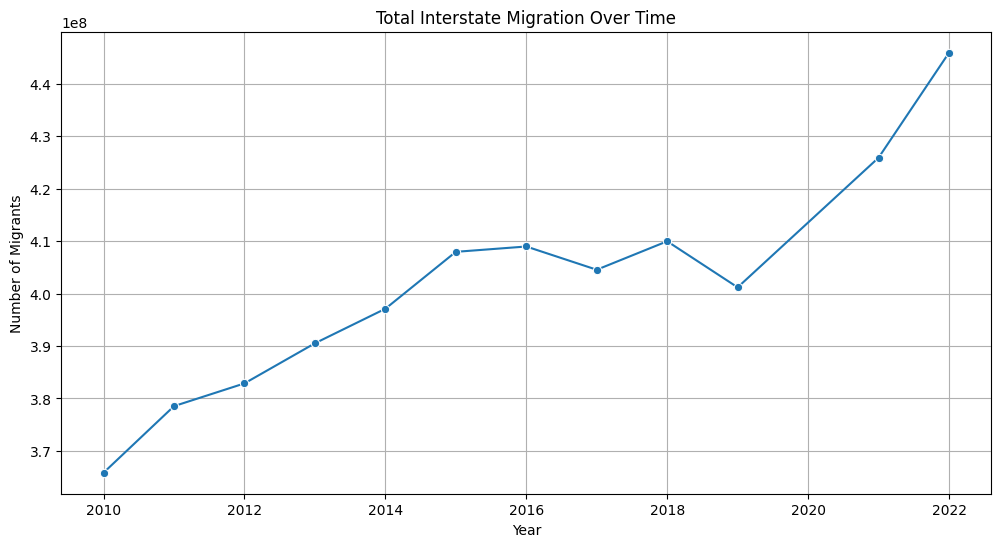

In [7]:
# Aggregate migration numbers by year
yearly_migration = df.groupby("year")["from_different_state_total"].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_migration, marker="o")
plt.title("Total Interstate Migration Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Migrants")
plt.grid(True)
plt.show()

<ipython-input-8-83c54d8e3c53>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette="coolwarm")


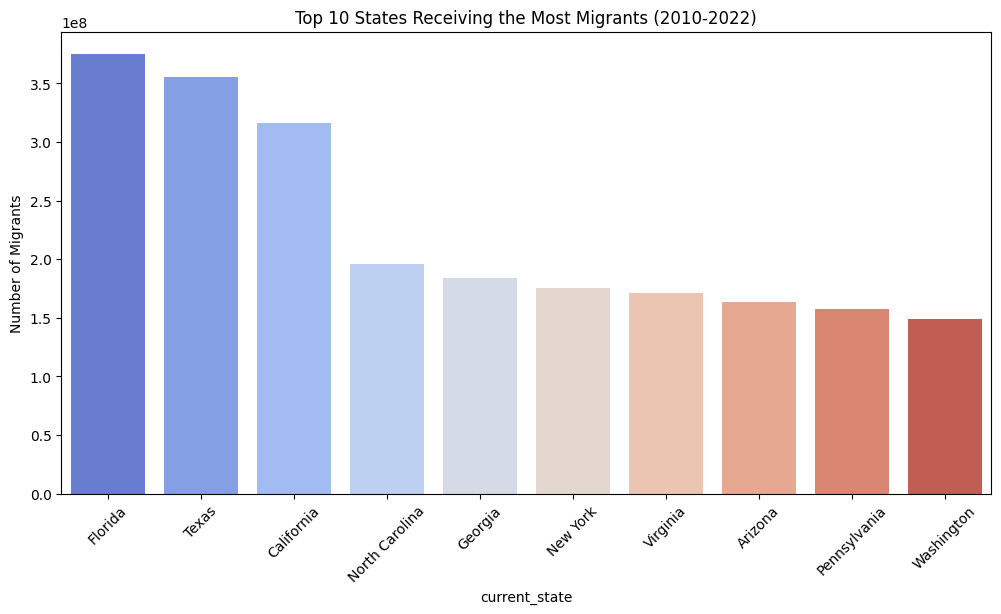

In [8]:
# Find top 10 states receiving most migrants
top_states = df.groupby("current_state")["from_different_state_total"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_states.index, y=top_states.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Top 10 States Receiving the Most Migrants (2010-2022)")
plt.ylabel("Number of Migrants")
plt.show()

In [20]:
# Check top state-to-state migration routes
state_migration = df.groupby(["from", "current_state"])["number_of_people"].sum().reset_index()

# Top 10 state-to-state flows
top_routes = state_migration.sort_values("number_of_people", ascending=False).head(10)

print(top_routes)

                       from  current_state  number_of_people
2656  abroad_ForeignCountry     California           3379996
2696  abroad_ForeignCountry          Texas           2366579
2661  abroad_ForeignCountry        Florida           2078522
2684  abroad_ForeignCountry       New York           1647889
252              California          Texas            897614
1673               New York        Florida            778443
2665  abroad_ForeignCountry       Illinois            771926
2699  abroad_ForeignCountry       Virginia            737535
2673  abroad_ForeignCountry  Massachusetts            732113
2682  abroad_ForeignCountry     New Jersey            728392


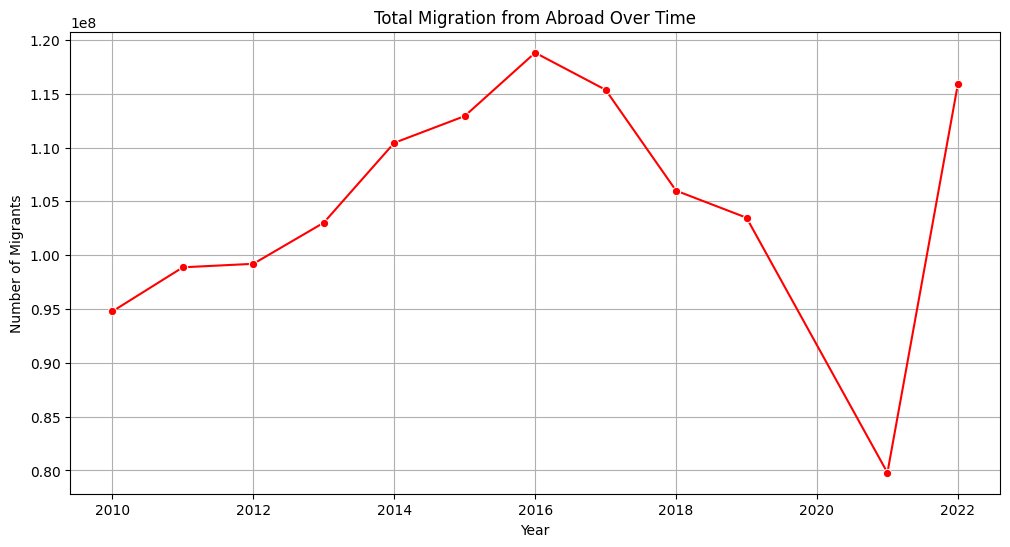

In [10]:
# Aggregate foreign migration by year(International Migration)
abroad_trend = df.groupby("year")["abroad_total"].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(data=abroad_trend, marker="o", color="red")
plt.title("Total Migration from Abroad Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Migrants")
plt.grid(True)
plt.show()

<ipython-input-11-952d939bf0fe>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_net_migration_states.index, y=top_net_migration_states.values, palette="viridis")


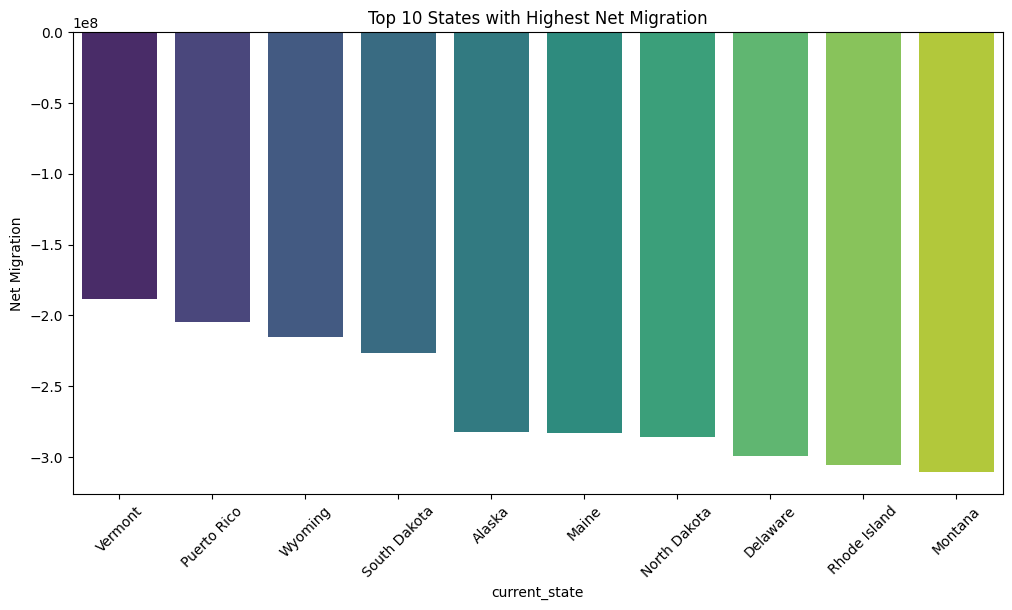

In [11]:
# Helps find states gaining or losing population due to migration.
df["net migration"] = df["from_different_state_total"] - df.groupby("current_state")["number_of_people"].transform("sum")

top_net_migration_states = df.groupby("current_state")["net migration"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_net_migration_states.index, y=top_net_migration_states.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 States with Highest Net Migration")
plt.ylabel("Net Migration")
plt.show()


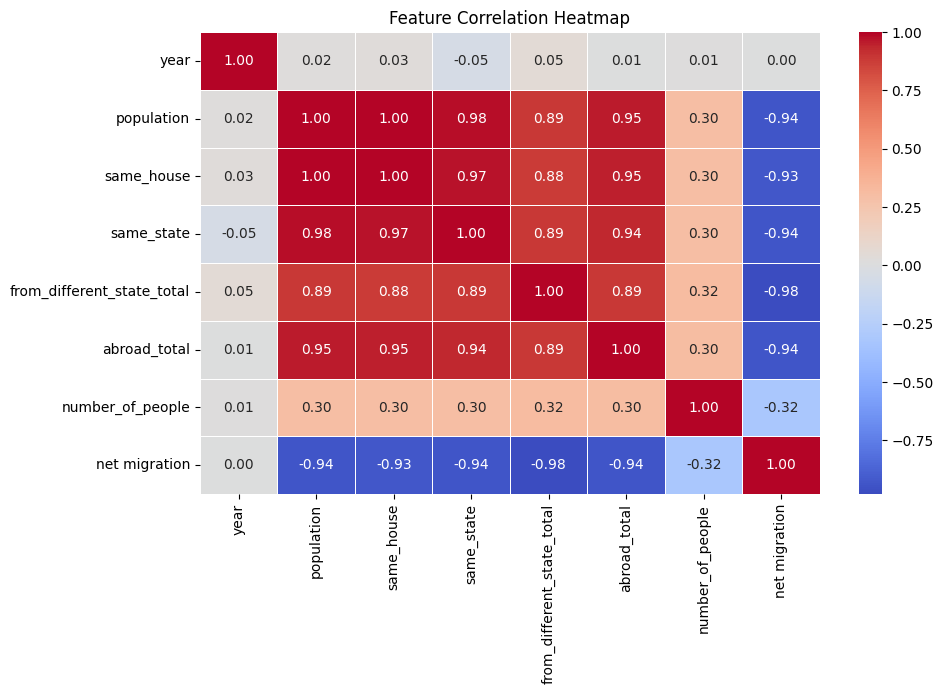

In [12]:
# Identifies relationships between variables (e.g., migration & population).
numeric_df = df.select_dtypes(include=["number", "float"])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [13]:
!pip install us

In [17]:
import plotly.express as px
import us

df["state_abbr"] = df["current_state"].map(lambda x: us.states.lookup(x).abbr if us.states.lookup(x) else x)

# Aggregate migration data by state abbreviation
state_migration = df.groupby("state_abbr")["from_different_state_total"].sum().reset_index()

fig = px.choropleth(state_migration,
                    locations="state_abbr",
                    locationmode="USA-states",
                    color="from_different_state_total",
                    color_continuous_scale="Blues",
                    title="State-to-State Migration (2010-2022)",
                    scope="usa")

fig.show()
